## Tesseract Evaluation - qualitative Analyse

In diesem notebook werden für die qualitative Anylyse der OCR-Ergebnisse von Tesseract, Bilder mit sehr schlechten oder mit sehr guten WER-Werten jeder Bildkategorie ausgegeben.  

Ziel ist es, herauszufinden, ob das Modell bei bestimmten Layouts, Schriften, Formaten o. Ä. strukturelle Schwächen zeigt.

Als Grundlage für "schlecht" und "gut" dienen der erreichte WER Werte der zeilenbasierten Evaluation.  
gut : WER < 0.11 (bei einigen Kategorien wurde der angepasst wenn kein Bild mit WER < 0.11 vorhanden war)  
schlecht : WER > 070


### Inhalt:

- allgemein
- [Kategorie simple](#kategorie-simple)
- [Kategorie fancy](#kategorie-fancy)
- [Kategorie noisy](#kategorie-noisy)
- [Kategorie skewed](#kategorie-skewed)
- [Kategorie photo](#kategorie-photo)

In [171]:
# importieren der Datei
import pandas as pd
df = pd.read_csv("../../data/OCR/tesseract/tesseract_evaluation_04_0_linewise_with_recognition_rate_category.csv")
df.head(2)

file_name  gt_lines  ocr_lines  matched_lines  mean_cer  mean_wer  \
0  0001.jpg         6         10              1  0.833333  0.833333   
1  0002.jpg         7         35              3  0.597744  0.653061   

   mean_char_acc  mean_word_acc  \
0       0.166667       0.166667   
1       0.397321       0.346939   

                                                                                                                                                                                                                                                                                                   ocr_tesseract_psm11  \
0                                                                                                                                                                                                ['*SP', 'CHCAFE&', 'WEIR', 'aHTSFELER', '\\\\—h[', '\\', 'l', 'U', 'ou1r-mgvu ZENTRUM —', 'WIR FREUEN UNS AUF EUCH!']   
1  ['D D', '3', '@', 'STA', 'N', '„', 'XM', 'S', '3', 'Z', "'}", '‘\\', 'A', '2a', 'LLL', 'n A', 'Au', '‘;n‚n', 'a', '5', '\\ /', 'L', 'E< );«rré‘', '‚-', '#SOLIDARITÄT MIT ALLEN!', 'BERICHTE: WIE WAR DIE BERLIN-DEMO WIRKLICH?', 'D', 'resden, Grofr Gaen‚ 8.8. u 16 Uhr', '\\', '\\', '3„«5', 'A', 'a', '<', 'e']   

  category  \
0    noisy   
1    noisy   

                                                                                                                                                                       ground_truth  \
0                                                                                      SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12 OLOF-PALME ZENTRUM 19 UHR WIR FREUEN UNS AUF EUCH!   
1  SCHLIESST EUCH AN! ET Video & Content nichtohneuns_Dresden KUNDGEBUNG #SOLIDARITÄT MIT ALLEN! BERICHTE: WIE WAR DIE BERLIN-DEMO WIRKLICH? DRESDEN, GROßER GARTEN, 8.8. UM 16 UHR   

   recognition_rate  
0          0.166667  
1          0.428571

--- 
### allgemein

In [4]:
df[df['mean_wer'] < 0.11].groupby('category').size()

category
fancy     1
simple    8
dtype: int64

In [6]:
df[df['recognition_rate'] == 1].groupby('category').size()

category
fancy      1
simple    12
skewed     2
dtype: int64

In [5]:
# bilder mit perfekter recognition rate
df.loc[df['recognition_rate'] == 1, ['file_name', 'category']]


file_name category
34    0041.jpg    fancy
94    0123.jpg   simple
95    0124.jpg   simple
103   0134.jpg   simple
105   0136.jpg   simple
109  0142.jpeg   simple
112   0146.jpg   simple
114   0148.jpg   simple
126  0162.jpeg   simple
157   0200.jpg   skewed
165   0208.jpg   simple
185   0228.jpg   skewed
190   0233.jpg   simple
191   0234.jpg   simple
197   0240.jpg   simple

Beispiel recognitionrate 1 


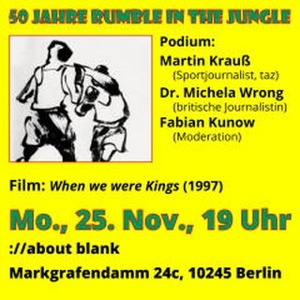

In [8]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0041.jpg')
img_resized = img.resize((300, 300))
print("Beispiel recognitionrate 1 ")
display(img_resized)

In [10]:
df.iloc[34]['ocr_tesseract_psm11']

"['50 JAHRE RUMDLE IN THE JUNGLE', 'D', '—] Podium:', '| Martin Krauß', '{Sportjoumalist, taz)', '| Dr. Michela Wrong', '!', '{br', 'ische Journalistin)', 'Fabian Kunow', '(Moderation)', 'Film: When we were Kings (1997)', 'M', '., 25. Nov., 19 Uhr', '://about blank', 'Markgrafendamm 24c, 10245 Berlin']"

Beispiel recognitionrate 1 


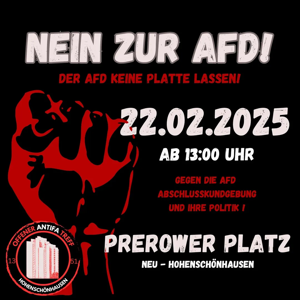

In [20]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0200.jpg')
img_resized = img.resize((300, 300))
print("Beispiel recognitionrate 1 ")
display(img_resized)

In [21]:
df.iloc[157]['ocr_tesseract_psm11']

'[\'NEIN ZUR AFDI\', \'DER AFD KEINE PLATTE LASSEN!\', \'2.02.2025\', \'/ AB 13:00 UHR\', \'GEGEN DIE AFD\', \'ABSCHLUSSKUNDGEBUNG\', \'UND IHRE POLITIK !\', \'r\', \'|\', \'ST\', \'AN\', \'(°)\', \'<\', \'x\', "\'REROWER PLATZ", \'13\', \'NEU - HOHENSCHÖNHAUSEN\', \'1\', \'®\', \'%\', \'/SCHI\', \'ön\', \'S\']'

In [24]:
# recognition rate
pd.set_option('display.max_colwidth', None)
df[df['mean_wer'] > 1][['file_name', 'mean_wer', 'ground_truth', 'ocr_tesseract_psm11', 'category']]

file_name  mean_wer  \
8    0011.jpg  1.178571   
29   0035.jpg  1.062500   
75   0100.jpg  1.650000   
78   0104.jpg  1.012500   
88   0117.jpg  1.375000   
167  0210.jpg  1.125000   

                                                                                                                                                                                                                                                   ground_truth  \
8                                                                                                                                 SAVE THE DATE Am 11. Januar 2025 nach Riesa PROTEST GEGEN DEN AFD-BUNDESPARTEITAG STOPPT DIE AfD Aufstehen-gegen-Rassismus.de   
29                                                                                                                                            FÜRSTENFELDER Salvator Neue Zähne beißen gut: Krügelredner Stefan KRÖLL! Das Starkbierfest 17.02.2024 - 20.00 Uhr   
75                                                                                                                                                                                    FAMILIEN-FLOHMARKT in der Paul-Schneider-Grundschule 25.05.24 10 - 14 Uhr   
78   Kiezklub Rathaus Johannisthal Sterndamm 102 WEIHNACHTSBAZAR 3. Dez. 14–19 Uhr Draußen: Glühwein und Gegrilltes Feuertonne und Stockbrot weihnachtliche Livemusik Stände mit interessanten Dingen Drinnen: Bastelstraße Kindertheater aus dem Koffer Filzen   
88                                                                                                           Bündnis gegen Verdrängung und #Mietenwahnsinn www.mietenwahnsinn.info DIE MIETE IST ZU HOCH! Demo, Samstag 01. Juni 2024 14:00 Uhr Potsdamer Platz   
167                                                                                                                                                 SUBCULTURE AGAINST PATRIARCHY! DEMO 08.03.2024 14:00–20:00 START: STRALAUER PLATZ (OSTBAHNHOF) + AFTERPARTY   

                                                                                                                                                                                                                                                                                                                                                                                                               ocr_tesseract_psm11  \
8    ['R', 'zl', '‚A', 'v', 'n', 'TL', 'H#', '— B', ']', 'e @Ä—@£a b', 'T', 'D', 'I', 'l', '3„', 'Am 11. Janvar 2025', 'l„‚', '}', 'A', 'M', 'B;“”‘', 'x=‚w nach R|esa in', '; 5 A.‚', '€‚', "‚ 1'?-'v*rv", '8', '{ 1', '4', 'AL', 'f', 'H', "la' !", '5}', '\\y 4', 'RI', 'BL', 'ABa', 'v;', '7!', 'S', 'W', '/', 'T', 'A', 'Al', '(', '4', '‚P', 'ür', 'e“’\\', 'F"', '\'I\'“" ‘Ä', "A',", 'Aufstehen gegen-ﬁä%ßmus d', '£„é E']   
29                                                                                                                                                                                                                                                                                ['— FÜRSTENFEL', 'Z', '©', 'Ele Zäh ne', 'Krü', '.9"-’/I\'ed„', '€r', 'ARÖLL', '$te/„„', 'E', '„ _ Das Starkbierfest', '17.02.2024 - 20.00 Uhr']   
75                                                                                                                                                                              ['—mm', 'B', 'W', 'D', '\\\\', '\\\\', 'Fa', 'L', 'l', 'W', '&_', '=', 'Z', '—_', '[', 'N', 'FAMILIEN-F ©HN\\AR ;', 'in der', 'e', 'Paul-Schneider- Grundschule [ S', 'Al', '10 14 Uhr', 'Da', '{', '3Ar O', '—d', '5,24', 'ya | MH', 'Ml', '(B}']   
78                                                                                                                                                                                       ['ub x:n.;;. Johannisthal Sterndamm 102', '‚a:4', 'ı $ —i', '4i', '|', 'ÄNACHTSBAZAR -', 'm', '-', '14 U® @ÜD[(°', 'an', '"A', 

Beispiel recognitionrate > 1 


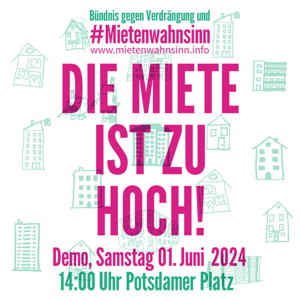

In [23]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0117.jpg')
img_resized = img.resize((300, 300))
print("Beispiel recognitionrate > 1 ")
display(img_resized)

In [172]:
df.loc[df['file_name'] == '0117.jpg', 'ocr_tesseract_psm11']

88    ['‚ Bündnis gegen Verdrängung und _', 'N#MIBIBIIW£IhIISIIIII', 'L', 'un', 'www mietenwahnsinn.info |5 r', 'ﬂ (D Ja', '£lr\\', 'H', 'IETE', 'a00', 'uu', 'üvu', 'Dn', 'u nQ', 'b', 'Bn', 'HE', '0l. lum', 'De', 'Samsfää', 'Z', '?', 'Z', '==', 's5=', '" 00 Uhr Potsdamer Pl']
Name: ocr_tesseract_psm11, dtype: object

Beispiel recognitionrate > 1 


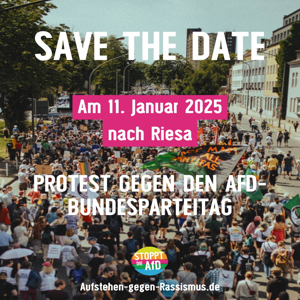

In [174]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0011.jpg')
img_resized = img.resize((300, 300))
print("Beispiel recognitionrate > 1 ")
display(img_resized)

In [173]:
df.loc[df['file_name'] == '0011.jpg', 'ocr_tesseract_psm11']

8    ['R', 'zl', '‚A', 'v', 'n', 'TL', 'H#', '— B', ']', 'e @Ä—@£a b', 'T', 'D', 'I', 'l', '3„', 'Am 11. Janvar 2025', 'l„‚', '}', 'A', 'M', 'B;“”‘', 'x=‚w nach R|esa in', '; 5 A.‚', '€‚', "‚ 1'?-'v*rv", '8', '{ 1', '4', 'AL', 'f', 'H', "la' !", '5}', '\\y 4', 'RI', 'BL', 'ABa', 'v;', '7!', 'S', 'W', '/', 'T', 'A', 'Al', '(', '4', '‚P', 'ür', 'e“’\\', 'F"', '\'I\'“" ‘Ä', "A',", 'Aufstehen gegen-ﬁä%ßmus d', '£„é E']
Name: ocr_tesseract_psm11, dtype: object

#### Bilder mit handschriftlichen Elementen:

Beispiel Handschrift 


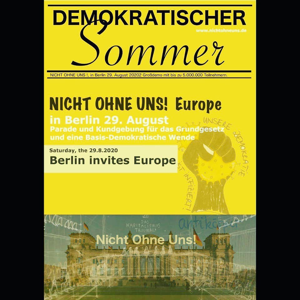

In [28]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0012.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [29]:
df.loc[df['file_name'] == '0012.jpg', 'ocr_tesseract_psm11']

9    ['KRATISCHER', 'S', 'oMM e%z', 'ICHT OHNE UNS !, in Berlin 29. August 20202 Großdemo mit bis zı', 'C', 'NICHT OHNE UNS! Eura /ODc', 'lnlcﬂln29', 'Parade und Kundgebung', 'KAnST e', 'und eine', 'Saturday, the 29.8.2020', 'Berlin invites Europe', '/', 'ne U', '1']
Name: ocr_tesseract_psm11, dtype: object

Beispiel Handschrift 


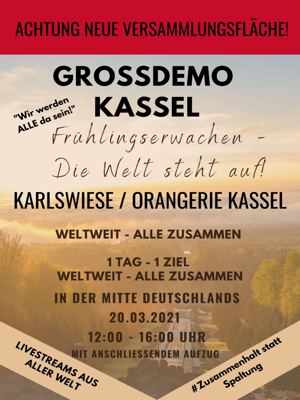

In [32]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0045.jpeg')
img_resized = img.resize((300, 400))
print("Beispiel Handschrift ")
display(img_resized)

In [34]:
df.loc[df['file_name'] == '0045.jpeg', 'ocr_tesseract_psm11']

37    ['OE', 'GROSSDEMO', 'KASSEL', '‘N“ e 5°‘“', 'NEN', '/', '—', 'v’:mmlmjäe/ww', 'Die Well 5fenf aufl', 'KARLSWIESE / ORANGERIE KASSEL', 'WELTWEIT - ALLE ZUSAMMEN', '1TAG - 1ZIEL', 'WELTWEIT - ALLE ZUSAMMEN', 'IN DER MITTE DEUTSCHLANDS', '20.03.2021', '— 12:00 - 16:00 UHR', 'E', 'l/|‚', 'ANSCHLIESSENDEM AW', 's', '<\\“°', '4', '«\\‘° \\\\‘)(‘9', '42', '7', 'Üs', 'v', 'R”']
Name: ocr_tesseract_psm11, dtype: object

Beispiel Handschrift 


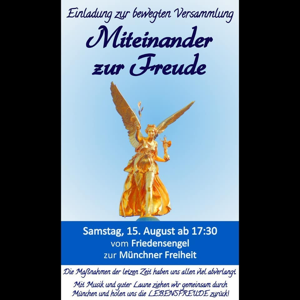

In [35]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0050.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [37]:
df.loc[df['file_name'] == '0050.jpg', 'ocr_tesseract_psm11']

41    ['Einladung zur bewegten Versammlung', 'Miteinander', 'zur Freude', 'm', '4®', 'An', '/', '\\\\\\', 'X', 'J.‘', 'Samstag, 15. August ab 17:30', 'vom Friedensengel', 'zur Münchner Freiheit', 'Die 7‘4%nafunm der letzen Zeit haben uns allen Viel abverlangt.', 'Mit Musik und guter Laune zighen', 'Wr gemeinsam durch', 'Mürnchen z//zd/zalen uns die LEBENS)', 'OE', 'REUDE zurück!']
Name: ocr_tesseract_psm11, dtype: object

Beispiel Handschrift 


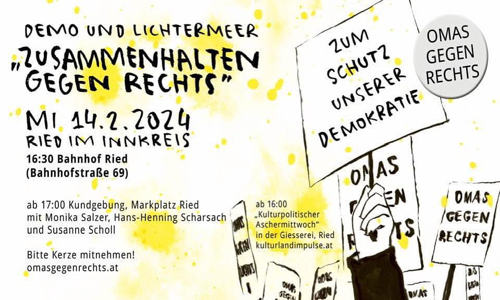

In [38]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0072.jpg')
img_resized = img.resize((500, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [39]:
df.loc[df['file_name'] == '0072.jpg', 'ocr_tesseract_psm11']

56    ['<', 'DEMO UND L', "EeER '", 'MAS', 'ﬂ°$l\\', 'NH', "-('L", 'c‚0s‘', '<JI- RECHTS', 'RECHTS* « }', 'un>', '.\\\\(-', '®', 'Ml 1N T ‘202ü', '®', 'RIED IM \\NN\\<RE\\S', '.', 'gn“', '16:30 Bahnhof Ried', '(Bahnhofstraße 69)', 'NS', 'ab 17:00 Kundgebüng,', 'Mark; Iatz.Rled', 'ab |6 00', 'OMA', 'mit Monika Salzer, Hans-', 'Scharsach', 'oli', 'GEGEN', 'und Susanne Scholl', '-', 'erei, Ried', 'RECHTS,', 'Bitte Kerze mitnehmen!', '<', 'pulse.at', 'Omasgegenrechts.at', 'v /', 'e', 'D )', '[ar}', 'w Lu\\']
Name: ocr_tesseract_psm11, dtype: object

Beispiel Handschrift 


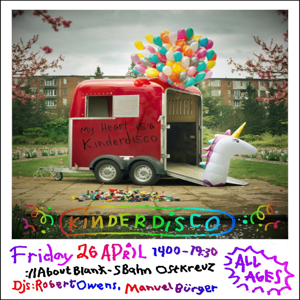

In [40]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0075.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [41]:
df.loc[df['file_name'] == '0075.jpg', 'ocr_tesseract_psm11']

59    ['n', 'i', 'N', 'a', 'ul |M', 'W', 'O0r', 'l Lr', 'M 3', 'r9', 'Al', "m'‚", 'K', 'S', '‘', 'i A', '© © _-', 'S', 'f AL', 'E', 'Co', '260', '‘ :/MAbovt BlanX- 5SBahn OSEKrevz', 'Djs:Robert', 'nf, Manvel DG']
Name: ocr_tesseract_psm11, dtype: object

Beispiel Handschrift 


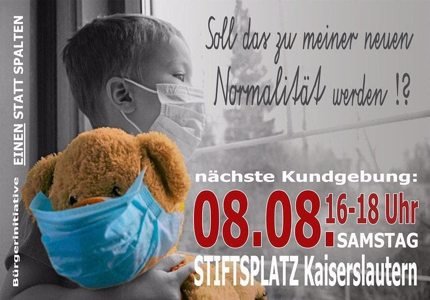

In [42]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0086.jpg')
img_resized = img.resize((430, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [43]:
df.loc[df['file_name'] == '0086.jpg', 'ocr_tesseract_psm11']

64    ['l |', 'SO%JAW MMM“ AAA', '1', 'Normali 6ı worden', ':', 'E', 'A \\', ')"', 'r" (0)', '[}', '\\\\\\', '\\', 'W i', 'G', 'V', 'ıU', '’OIÜ', 'j', 'BEAR!', '. M', 'a|»', 'u', 'ala', '*\\ü']
Name: ocr_tesseract_psm11, dtype: object

Beispiel Handschrift 


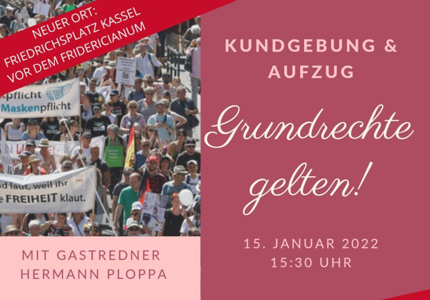

In [44]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0089.jpeg')
img_resized = img.resize((430, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [46]:
df.loc[df['file_name'] == '0089.jpeg', 'ocr_tesseract_psm11']

65    ['&v', 'UT', '\\p', 'N', 'R', 'fn', 'KUNDGEBUNG &', 'RC', 'oRC', 'AUFZUG', 'O®', 'e y', 'K', 'PNG', 'v', '£WWCÄL‘6', 'L', 'u', 'yr', '/', 'a', '—', '15. JANUAR 2022', 'MIT GASTREDNER', '15:30 UHR', 'HERMANN PLOPPA']
Name: ocr_tesseract_psm11, dtype: object

Beispiel Handschrift 


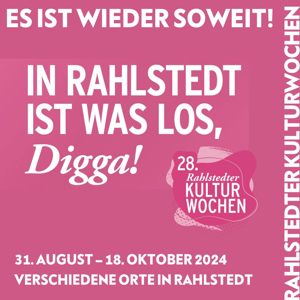

In [47]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0181.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [49]:
df.loc[df['file_name'] == '0181.jpg', 'ocr_tesseract_psm11']

142    ['ESIST WIEDER SOWEIT! £', 'O', 'z', 'IN RAHLSTEDT', 'IST WAS LOS,', '-', '>', '28-', 'Digga!', 'Rahlsted:', 'KULTUR \\', 'WOCHEN', '31. AUGUST - 18. OKTOBER 2024', 'VERSCHIEDENE ORTE IN RAHLSTEDT']
Name: ocr_tesseract_psm11, dtype: object

Beispiel Handschrift 


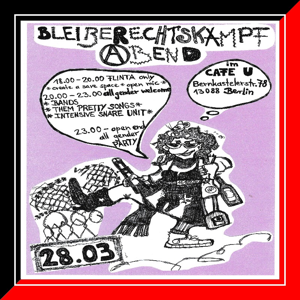

In [50]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0238.jpg')
img_resized = img.resize((300, 300))
print("Beispiel Handschrift ")
display(img_resized)

In [51]:
df.loc[df['file_name'] == '0238.jpg', 'ocr_tesseract_psm11']

195    ['BLEINE', 'ECHTSKÄMPF', 'END', 'CAFE U', '800 - 20.00 FLINTA o', 'Bexnkastelersh. 78', '.0.00 — 25 00alg', 'fı neahe 0 SOve Space * o', 'E rdes', '\\ DA', 'ND:', '6S', "4308 $e„-.'", 'e THEM', 'IINTENSIVE SNARE', "PREITY -SON'", 'UNTT*', 'an', '7300', 'p', 'R', 'SWA', 'S', 'A', 'Da', 'A}', 'A', '(', '!', 'f', 'SN', '“', 'N', '28.02']
Name: ocr_tesseract_psm11, dtype: object

---

### Kategorie simple

#### Bilder mit gutem WER

In [53]:
 # bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.11) & (df['category'] == 'simple'), 'file_name']

94      0123.jpg
95      0124.jpg
103     0134.jpg
114     0148.jpg
118     0153.jpg
126    0162.jpeg
136     0173.jpg
190     0233.jpg
Name: file_name, dtype: object

Beispiel -simple- gut 


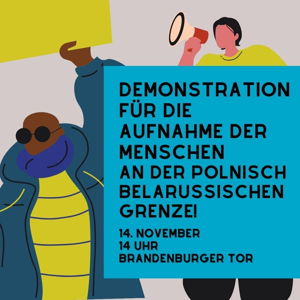

In [57]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0173.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- gut ")
display(img_resized)

In [58]:
df.loc[df['file_name'] == '0173.jpg', 'ocr_tesseract_psm11']

136    ['Up®', 'DEMONSTRATION', 'FÜR DIE', 'AUFNAHME DER', 'MENSCHEN', 'AN DER POLNISCH', 'BELARUSSISCHEN', 'GRENZE!', '14. NOVEMBER', 'BRANDENBURGER TOR', '\\ A |']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -simple- gut 


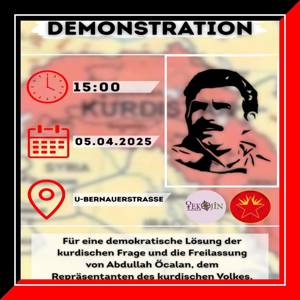

In [59]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0233.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- gut ")
display(img_resized)

In [60]:
df.loc[df['file_name'] == '0233.jpg', 'ocr_tesseract_psm11']

190    ['DEMONSTRATION', '15:00', 'C', '\\', '05.04.2025', 'D', 'V', 'Y', '/', 'U-BERNAUERSTRASSE', 'LEKEDJiN', 'Für eine demokratische Lösung der', 'kurdischen Frage und die Freilassung', 'von Abdullah Öcalan, dem', 'Repräsentanten des kurdischen Volkes,']
Name: ocr_tesseract_psm11, dtype: object

#### Bilder mit schlechtem WER

In [61]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'simple'), 'file_name']

87      0116.jpg
88      0117.jpg
89     0118.jpeg
102     0133.jpg
104     0135.jpg
110     0143.jpg
111     0145.jpg
115     0149.jpg
116     0151.jpg
117     0152.jpg
119    0154.jpeg
120     0155.jpg
121    0156.jpeg
125     0161.jpg
127     0163.jpg
183     0226.jpg
192     0235.jpg
Name: file_name, dtype: object

Beispiel -simple- schkecht 


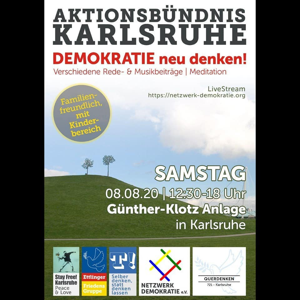

In [64]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0116.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- schkecht ")
display(img_resized)

In [65]:
df.loc[df['file_name'] == '0116.jpg', 'ocr_tesseract_psm11']

87    ['AKTIONSBÜNDNIS', 'KARLSRUHE', 'DEMOKRATIE neu denken!', 'Verschiedene Rede- & Musikbeiträge | Meditation', 'https://netzwerk-dem:', 'Li', '4 [üi \\', 'pereich.', 'SAMSULG)', '08.08.20"2:50', 'AS Unr', "Günti1er- Klo'tz X", 'rin l$arlsréhg', 'Z', '+n', 'A', 'Stay Free!', 'Ettling:', '&L', 'Friedens', 'MOKRATIE']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -simple- schkecht 


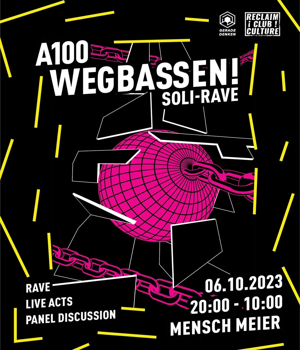

In [170]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0145.jpg')
img_resized = img.resize((300, 350))
print("Beispiel -simple- schkecht ")
display(img_resized)

In [70]:
df.loc[df['file_name'] == '0145.jpg', 'ocr_tesseract_psm11']

111    ['RE[:I.MM', 'asuns', 'GUlI’IIRE', '\\', 'M00= Z', 'GBA', 'SSEN!', '1ı', 'SOLI -RAVE', '/WE', "I'.", 'Z', 'E', 'S', 'W', 'NN', 'N', '-—', '%', 'W', '/ |', '‘vau%', 'IIIII\\', '—', "'I", '|!', 's°o', '—', '>', 'ISS', 'i', 'RAVE', '6.10.2023', 'VEACTS', '0:00 -.10:00', 'ANEL DISCUSSION', '[', '——', 'MENSCH MEIER', '——']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -simple- schkecht 


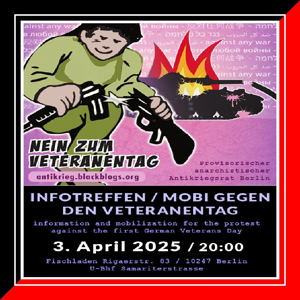

In [72]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0235.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -simple- schkecht ")
display(img_resized)

In [73]:
df.loc[df['file_name'] == '0235.jpg', 'ocr_tesseract_psm11']

192    ['A', 'w', 'W', 'NU', '%', 'A', "„»®'", 'NEIN,', 'ZUM', 'VETERANENTAG', 'ant', 'c| blu(kl:luq> org', 'Antikr', 'ra', 'INFOTREFFEN / MOBI GEGEN', 'DEN VETERANENTAG', 'information and mobilization for the protest', 'against the first German Veterans Day', '3. April 2025 / 20:00', 'Fischladen Rigaerstr', '83 / 10247 Berlin', 'U-Bhf Samariterstrasse']
Name: ocr_tesseract_psm11, dtype: object

---

### Kategorie fancy

#### Bilder mit gutem WER

In [74]:
 # bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.11) & (df['category'] == 'fancy'), 'file_name']

52    0064.jpg
Name: file_name, dtype: object

Beispiel -fancy- gut 


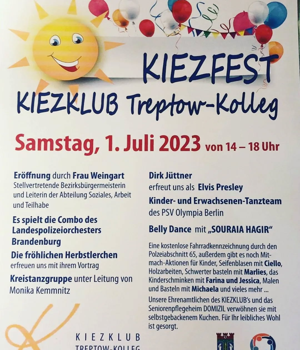

In [169]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0064.jpg')
img_resized = img.resize((300, 350))
print("Beispiel -fancy- gut ")
display(img_resized)

In [76]:
df.loc[df['file_name'] == '0064.jpg', 'ocr_tesseract_psm11']

52    ['‘«', 'D4', '@', 'S', 'KIE', 'KIEZKLUB Treptow- Ko%og', '5am5tag‚ 1 JUI| 2023 von 14 — 18 Uhr', 'Eröffnung durch Frau Weingart', 'Dirk Jüttner', 'Stellvertretende Bezirksbürgermeisterin', 'und Leiterin der Abteilung Soziales, Arbeit', 'erfreut uns als Elvis Presley', 'Kinder- und Erwachsenen-Tanzteam', 'und Teilhabe', 'des PSV Olympia Berlin', 'Es spielt die Combo des', 'Landespolizeiorchesters', 'Belly Dance mit „SOURAIA HAGIR“', 'Brandenburg', 'Eine kostenlose Fahrradkennzeichnung durch den', 'Die fröhlichen Herbstlerchen', 'Polzeiabschnitt 65, außerdem gibt es noch Mit-', 'mach-Aktionen für Kinder, Seifenblasen mit Ciello,', 'erfreuen uns mit ihrem Vortrag', 'Holzarbeiten, Schwerter basteln mit Marlies, das', 'Kreistanzgruppe unter Leitung von', 'Kinderschminken mit Farina und Jessica, Malen', 'Monika Kemmnitz', 'und Basteln mit Michaela und vieles mehr', "Unsere Ehrenamtlichen des KIEZKLUB's und das", '/', 'Seniorenpflegeheim DOMIZIL verwöhnen sie mit', 'selbstgebackenem Kuc

#### Bilder mit schlechtem WER

In [77]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'fancy'), 'file_name']

29      0035.jpg
30      0036.jpg
31     0037.jpeg
32     0039.jpeg
35      0043.jpg
38     0046.jpeg
39      0047.jpg
40      0049.jpg
43     0052.jpeg
44      0054.jpg
45      0055.jpg
47      0059.jpg
48      0060.jpg
49      0061.jpg
50      0062.jpg
55      0071.jpg
56      0072.jpg
59      0075.jpg
60      0078.png
61      0080.jpg
62      0081.jpg
63      0082.jpg
64      0086.jpg
66     0090.jpeg
67      0091.jpg
155     0198.jpg
158     0201.jpg
160     0203.jpg
167     0210.jpg
168     0211.jpg
169     0212.jpg
171     0214.jpg
180     0223.jpg
182     0225.jpg
184     0227.jpg
187     0230.jpg
188     0231.jpg
195     0238.jpg
Name: file_name, dtype: object

Beispiel -fancy- schlecht 


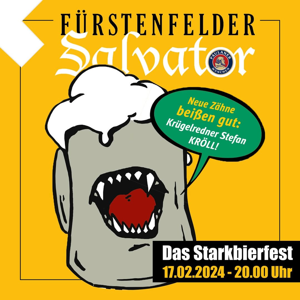

In [78]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0035.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [79]:
df.loc[df['file_name'] == '0035.jpg', 'ocr_tesseract_psm11']

29    ['— FÜRSTENFEL', 'Z', '©', 'Ele Zäh ne', 'Krü', '.9"-’/I\'ed„', '€r', 'ARÖLL', '$te/„„', 'E', '„ _ Das Starkbierfest', '17.02.2024 - 20.00 Uhr']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -fancy- schlecht 


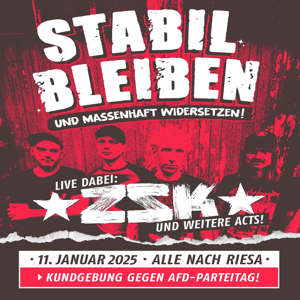

In [80]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0043.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [81]:
df.loc[df['file_name'] == '0043.jpg', 'ocr_tesseract_psm11']

35    ['ABIL', 'LE', 'IBEN', 'UND', 'MARSSENHAFT WIDERSETZEN!', '—__', 'IVE DA', 'UND WE', 'ITERE ACTS!']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -fancy- schlecht 


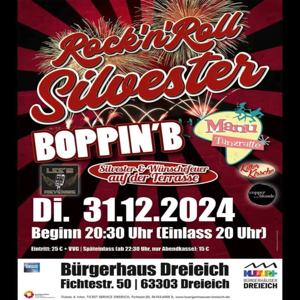

In [82]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0049.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [83]:
df.loc[df['file_name'] == '0049.jpg', 'ocr_tesseract_psm11']

40    ['\\', 'N', 'MS', 'VL', '—', '7', 'd', 'N', 'Z', 'N', 'N', 'l{ w', 'Y', '\\ Xr', 'N', 'BOPPIN B', '25 S', 'E &$', '3', 'P', 'C', 'S', '“ onde', '_-', 'Di. 3112.2024', 'Beginn 20:30 Uhr (Einlass 20 Uhn)', 'Eintritt: 25 € + VVG | Späteinlass (albı 22:30 Uhr, nur Abendkasse): 15 €', 'E', 'Bürgerhaus Dreieich X']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -fancy- schlecht 


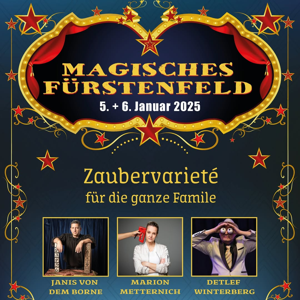

In [84]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0054.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [85]:
df.loc[df['file_name'] == '0054.jpg', 'ocr_tesseract_psm11']

44    ['a', 'z a', '.__/\\___G', 'A', '\\/J(’—\\Z', 'Z O', 'S', 'L>', 'D', '&N', 'MAG', 'HES', 'FÜUÜRSTENFELD', '5. + 6. Januar 2025', 'K w', 'D', 'Zaubervariete', 'für die ganze Famile', '®', '®', '”', '_']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -fancy- schlecht 


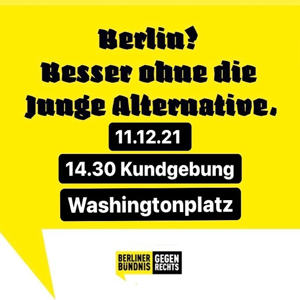

In [86]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0225.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [87]:
df.loc[df['file_name'] == '0225.jpg', 'ocr_tesseract_psm11']

182    ['Berlin?!', 'Besser ohue die', 'Junge Alternative.,', '[14.30 Kundgebung |', '_ Washingtonplatz |']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -fancy- schlecht 


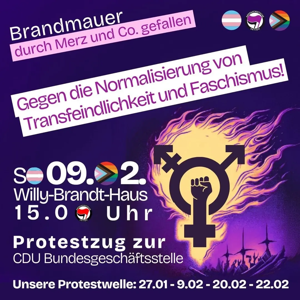

In [88]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0201.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [89]:
df.loc[df['file_name'] == '0201.jpg', 'ocr_tesseract_psm11']

158    ['85', 'Braßn', 'maU', 'co.£ efallen', 'Aur cch Me', 'erz und', 'AIS 5 h\\sm\\_ls\\', 'GE', 'öﬂd', 'tichK', 'AL', 'Ü/J', 'se09.+ 2. “\\7', '%£> Jf', 'Willy-Brandt-Haus \\', 'Dn', 'VE', '15.0 © Uhr*', 'Protestzus zur', '_', 'CDU Bundesgeschäftsstelle', 'K', 'Unsere Protestwelle: 27.01 - 9.02 - 20.02 - 22.02']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -fancy- schlecht 


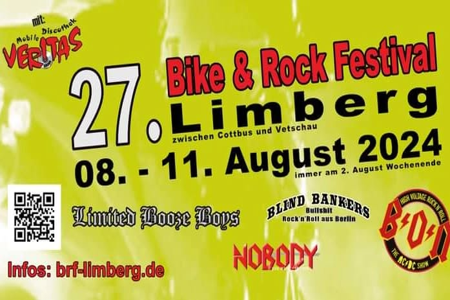

In [100]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0091.jpg')
img_resized = img.resize((450, 300))
print("Beispiel -fancy- schlecht ")
display(img_resized)

In [101]:
df.loc[df['file_name'] == '0091.jpg', 'ocr_tesseract_psm11']

67    ['s', 'erg', '. 2.7', 'oLim,', 'zwischen C', '2024', 'Wochenendo', '„ 11 .Aug', 'Monpe Moyıs', '—}']
Name: ocr_tesseract_psm11, dtype: object

---

### Kategorie noisy

#### Bilder mit gutem WER 0.25

In [105]:
 # bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.25) & (df['category'] == 'noisy'), 'file_name']

18    0022.jpg
Name: file_name, dtype: object

Beispiel -noisy- gut 


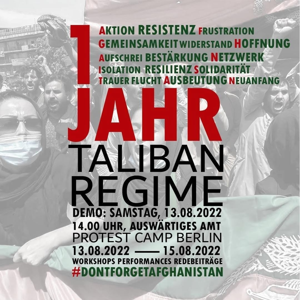

In [106]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0022.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- gut ")
display(img_resized)

In [107]:
df.loc[df['file_name'] == '0022.jpg', 'ocr_tesseract_psm11']

18    ['AKTION RESISTENZ FRUSTRATION', 'GEMEINSAMKEIT WIDERSTAND HOFFNUNG', 'AUFSCHREI BESTÄRKUNG NETZWERK', 'ISOLATION RESILIENZ SOLIDARITÄT', 'TRAUER FLUCHT AUSBEUTUNG NEUANFANG', 'JAHR', 'TALIBAN', 'DEMO: SAMSTAG, 13.08.2022', '14.00 UHR, AUSWARTIGES AMT', 'PROTEST CAMP BERLIN', 'WORKSHOPS PERFORMANCES REDEBEITRAGE', '13.08.2022', '15.08.2022', '#DONTFORGETAFGHANISTAN']
Name: ocr_tesseract_psm11, dtype: object

#### Bilder mit schlechtem WER

In [109]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'noisy'), 'file_name']

0      0001.jpg
3      0004.jpg
4      0006.jpg
5      0007.jpg
6      0009.jpg
7      0010.jpg
8      0011.jpg
11     0014.jpg
12     0015.jpg
15    0018.jpeg
16     0019.jpg
17     0020.jpg
21     0025.jpg
22     0026.jpg
23     0027.jpg
24     0028.jpg
25     0029.jpg
26     0030.jpg
27     0031.jpg
28     0032.jpg
Name: file_name, dtype: object

Beispiel -noisy- schlecht 


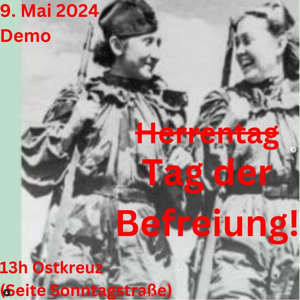

In [110]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0007.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- schlecht ")
display(img_resized)

In [111]:
df.loc[df['file_name'] == '0007.jpg', 'ocr_tesseract_psm11']

5    ['Cl', 'ß', '‘{', 'Z', 'F', '‘Y‘?', '[\\', '- «X', '4 on', 'AL', 'N', 'N']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -noisy- schlecht 


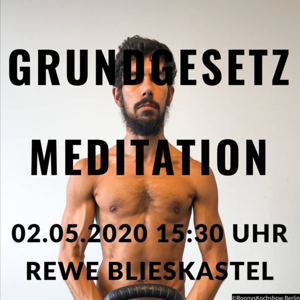

In [112]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0010.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- schlecht ")
display(img_resized)

In [113]:
df.loc[df['file_name'] == '0010.jpg', 'ocr_tesseract_psm11']

7    ['GRU', 'ESETZ', 'MED', '%', '02.0522020', 'THDN', ') UHR', 'REWELBE', 'M', 'TEL']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -noisy- schlecht 


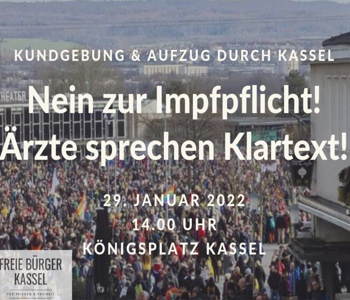

In [116]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0018.jpeg')
img_resized = img.resize((350, 300))
print("Beispiel -noisy- schlecht ")
display(img_resized)

In [117]:
df.loc[df['file_name'] == '0018.jpeg', 'ocr_tesseract_psm11']

15    ['KUNDGEBUNG & AUFZUG bURCH KﬁSSEL', 'HEATER', "nlmpfpfhcht'", "Arzte sprechen Klartext'", '—', '—', '€ 4 29 JANÜA‚R 2[pzz', 'J', '14..GQ UHR’', '%', 'Z', 'kONIGSPLNTZ KASSEL', 'REIE BURGER', 'x', 'z', '\\']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -noisy- schlecht 


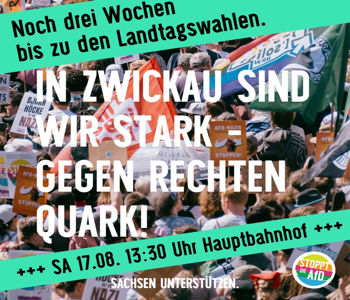

In [118]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0025.jpg')
img_resized = img.resize((350, 300))
print("Beispiel -noisy- schlecht ")
display(img_resized)

In [119]:
df.loc[df['file_name'] == '0025.jpg', 'ocr_tesseract_psm11']

21    ['\\ a', '/&', '] 2', 'aß', 'r', 'a', 'Y', '}', 'Bllnf $', 'kar', '/', 'P;', '‚7 s', 'VE', 'ME', '_', 'y', '5 ®', 'AF0D.', 'd', 'w', 'k', 'av', '7 »', 'ahf', 'STOPPE', 'Y', 'A', '‚l', 'LV', '\\r', 'BT']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -noisy- schlecht 


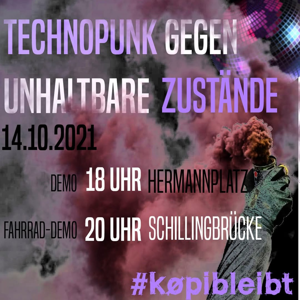

In [121]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0031.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -noisy- schlecht ")
display(img_resized)

In [122]:
df.loc[df['file_name'] == '0031.jpg', 'ocr_tesseract_psm11']

27    ['TECHNOPUNK GEGENS.. 4', 'UNHAITRARE ZUSTÄDE”', '18 UHR', 'aD UHR SCHLNGORÜCKE. —']
Name: ocr_tesseract_psm11, dtype: object

---

### Kategorie skewed

#### Bilder mit gutem WER

In [129]:
 # bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.35) & (df['category'] == 'skewed'), 'file_name']

166    0209.jpg
172    0215.jpg
173    0216.jpg
Name: file_name, dtype: object

Beispiel -skewed- gut 


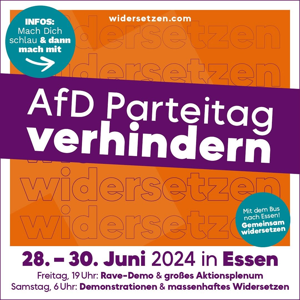

In [130]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0209.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -skewed- gut ")
display(img_resized)

In [131]:
df.loc[df['file_name'] == '0209.jpg', 'ocr_tesseract_psm11']

166    ['widersetzen.com', 'INFOS:', 'Mach Dich', 'schlau & dann', 'mach mit', '>', 'ATD Parteita', 'verhindern', 'Mit dem Bus', 'nach Essen!', 'Gemeinsam', 'widersetzen', '28. - 30. Juni 2024 in Essen', 'Freitag, 19 Uhr: Rave-Demo & großes Aktionsplenum', 'Samstag, 6 Uhr: Demonstrationen & massenhaftes Widersetzen']
Name: ocr_tesseract_psm11, dtype: object

#### Bilder mit schlechtem WER

In [134]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'skewed'), 'file_name']

138    0177.jpg
139    0178.jpg
143    0182.jpg
144    0183.jpg
145    0185.jpg
147    0187.jpg
149    0191.jpg
150    0193.jpg
152    0195.jpg
159    0202.jpg
161    0204.jpg
163    0206.jpg
164    0207.jpg
179    0222.jpg
181    0224.jpg
185    0228.jpg
186    0229.jpg
189    0232.jpg
Name: file_name, dtype: object

Beispiel -skewed- schlecht 


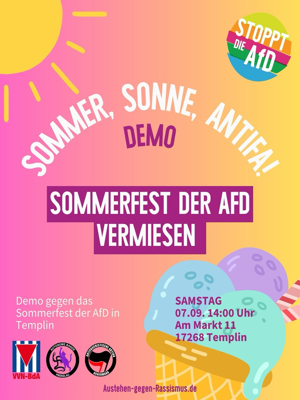

In [136]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0177.jpg')
img_resized = img.resize((300, 400))
print("Beispiel -skewed- schlecht ")
display(img_resized)

In [137]:
df.loc[df['file_name'] == '0177.jpg', 'ocr_tesseract_psm11']

138    ['DEMO', 'SOMMERFEST DER AFD', 'VERMIESEN', "7.0'", 'Z', 'kı', 'E N', 'mp', 'M', 'O', 'N.', 'dA', 'CKERWS', 'Austehen-gegen-Rassismus.de']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -skewed- schlecht 


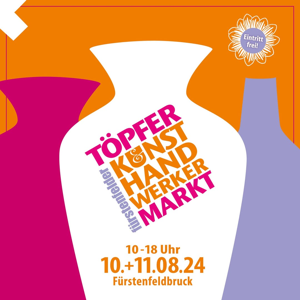

In [139]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0185.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -skewed- schlecht ")
display(img_resized)

In [140]:
df.loc[df['file_name'] == '0185.jpg', 'ocr_tesseract_psm11']

145    ['S', '(', 'R', 'E', '(', 'ZA', 'Z', 'D', 'E', '(', 's', '=—)', 'S', 'S', 'RA', '_‚', 'N)', '\\A', '\\', '(*', 'N', 'A', 'b', 'A', 'V/ \\/\\', 'V \\', '©', '-', '&A', '_J)/', '&x', 'D', '\\\\', 'x', '„', '>', 'CAXN', '>', '\\\\r', 'A', '\\x', 'A', 'k >', '\\w', '«N', '10-18', 'Uhr', "4 (']\\", '10.+', '-11.0', 'VUO.', '*)Lr‘', 'z', 'D', 'Fürstenfe', 'eldb', 'JrUu', 'ck']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -skewed- schlecht 


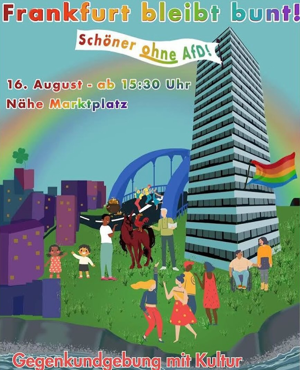

In [145]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0207.jpg')
img_resized = img.resize((300, 370))
print("Beispiel -skewed- schlecht ")
display(img_resized)

In [146]:
df.loc[df['file_name'] == '0207.jpg', 'ocr_tesseract_psm11']

164    ['@mukßwﬂ* bleibibunf!', 'S', 'ne AtD\\', '16. Aug', '15:30', 'Ührr)', 'A', 'Näl', 'Kkiplatz', 'L', '\\_é/', 'A C°', "J\\'", '”', '—', 'L', 'ma Kuliur Z']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -skewed- schlecht 


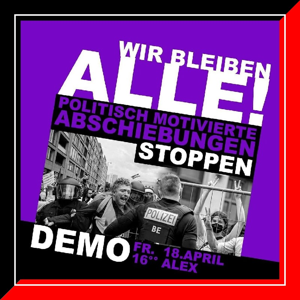

In [147]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0229.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -skewed- schlecht ")
display(img_resized)

In [148]:
df.loc[df['file_name'] == '0229.jpg', 'ocr_tesseract_psm11']

186    ['ALL', "E'", ']', 'ﬂ rä', 'STOPPEN', 'MS', '‚w', 'BE', 'DE', 'MO']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -skewed- schlecht 


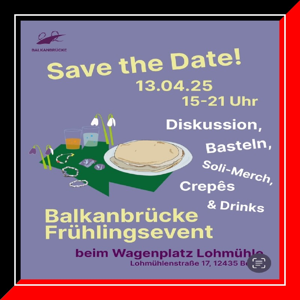

In [149]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0232.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -skewed- schlecht ")
display(img_resized)

In [150]:
df.loc[df['file_name'] == '0232.jpg', 'ocr_tesseract_psm11']

189    ['13.04.25', '15-21 Uhr', '4N', 'Diskussion', '«', 'V', 'Ol ‘Me‚-', '<', 'Crepes', '& Drinks', 'Balkanbrücke', 'Fruhlmgsevent', '&o', '_n']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -skewed- schlecht 


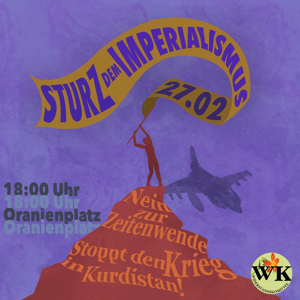

In [151]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0191.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -skewed- schlecht ")
display(img_resized)

In [152]:
df.loc[df['file_name'] == '0191.jpg', 'ocr_tesseract_psm11']

149    ['18:00 Uhr', 'E', 'Oranignphtz', 'A']
Name: ocr_tesseract_psm11, dtype: object

---

### Kategorie photo

#### Bilder mit gutem WER

In [156]:
 # bilder mit gutem WER
df.loc[(df['mean_wer'] < 0.25) & (df['category'] == 'photo'), 'file_name']

77    0103.jpg
Name: file_name, dtype: object

Beispiel -photo- gut 


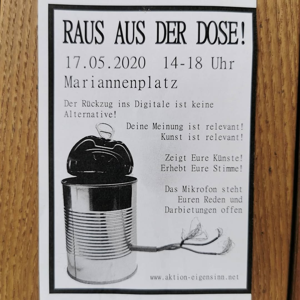

In [157]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0103.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -photo- gut ")
display(img_resized)

In [158]:
df.loc[df['file_name'] == '0103.jpg', 'ocr_tesseract_psm11']

77    ['Y', '{', 'M', '4„', 'AI', '/', 'M', '\\', '(', 'd', 'A', '\\"\'', '1', ']', 'h„', 'Y', '#', 'E', '1', '\\', 'RAUS AUS DER DOSE!', 'Ü', "M'", 'M', '‘‚‘ nh', "'", 'M', 'IM', 'Ä', '17.05.2020', '14-18 Uhr', 'K', 'V', 'f', 'Mariannenplatz', 'j', 'A', '\\', '44', 'A', 'f', 'M', 'W', '0', '{', 'N', '1', '4M', 'Der Rückzug ins Digitale ist keine', 'm', 'Y', 'Alternative!', '\\', 's', 'Deine Meinung ist relevant!', '/', 'Kunst ist relevant!', 'A', '/', 'f', '1', 'Zeigt Eure Künste!', '4', 'F', '/', "'", 'Erhebt Eure Stimme!', 'f', 'C', 'f', 'f', 'M', 'AL', 'il', 'Das Mikrofon stel', '\\”£', '( A', 'Euren Reden', '4', 'f ‚yﬂ', 'u', 'al', 'W', 'W N', 'Darbietungen offen', '%i', 'aV', 'I', 'Y', '/', '!', 'I8}', 'Jl {”1', 'W', 'W', 'f', 'Ä„(}M»«y', "_..._'//", 'W', 'I', "r\\‘!'", 'www.aktion', '1gensın', '37', 'M', 'I', 'M', '\\l', 'N', "]\\ I '", 'W', 'b', 'W']
Name: ocr_tesseract_psm11, dtype: object

#### Bilder mit schlechtem WER

In [159]:
# bilder mit schlechtem WER
df.loc[(df['mean_wer'] > 0.70) & (df['category'] == 'photo'), 'file_name']

70     0095.jpg
71     0096.jpg
74     0099.jpg
75     0100.jpg
76     0101.jpg
78     0104.jpg
81     0110.jpg
82     0111.jpg
83     0112.jpg
84     0113.jpg
85     0114.jpg
196    0239.jpg
199    0242.jpg
Name: file_name, dtype: object

Beispiel -photo- schlecht 


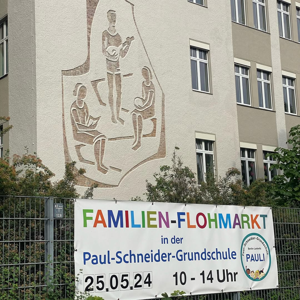

In [160]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0100.jpg')
img_resized = img.resize((300, 300))
print("Beispiel -photo- schlecht ")
display(img_resized)

In [161]:
df.loc[df['file_name'] == '0100.jpg', 'ocr_tesseract_psm11']

75    ['—mm', 'B', 'W', 'D', '\\\\', '\\\\', 'Fa', 'L', 'l', 'W', '&_', '=', 'Z', '—_', '[', 'N', 'FAMILIEN-F ©HN\\AR ;', 'in der', 'e', 'Paul-Schneider- Grundschule [ S', 'Al', '10 14 Uhr', 'Da', '{', '3Ar O', '—d', '5,24', 'ya | MH', 'Ml', '(B}']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -photo- schlecht 


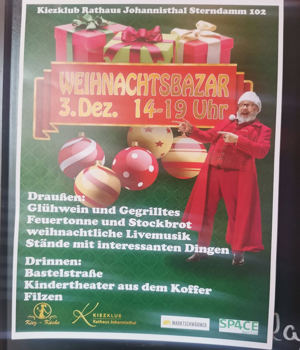

In [163]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0104.jpg')
img_resized = img.resize((300, 350))
print("Beispiel -photo- schlecht ")
display(img_resized)

In [164]:
df.loc[df['file_name'] == '0104.jpg', 'ocr_tesseract_psm11']

78    ['ub x:n.;;. Johannisthal Sterndamm 102', '‚a:4', 'ı $ —i', '4i', '|', 'ÄNACHTSBAZAR -', 'm', '-', '14 U® @ÜD[(°', 'an', '"A', 'n', 'I', '®', 'NS', 'Ites', 'PE', 'D', '[', 'Dingen', 'Kindertheater aus.', 'Riez - Küche', 'Rat', 's }']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -photo- schlecht 


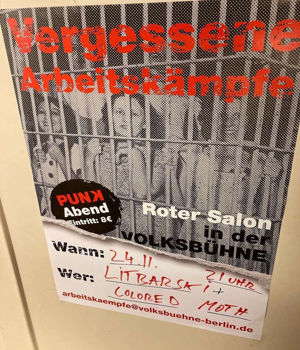

In [165]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0239.jpg')
img_resized = img.resize((300, 350))
print("Beispiel -photo- schlecht ")
display(img_resized)

In [166]:
df.loc[df['file_name'] == '0239.jpg', 'ocr_tesseract_psm11']

196    ['A', 'n', '5', 'D S', 'ng', ':', '4R IO', 'O,', 'x', '.&', 'S', '\\n', 'Aben', 'rı s', 'SS', 'S', 'S', 'Wa', 'an', 'a \\', 'an', 'da', 'SS', '—m ——Äm— — . J', ')-', '—', '—_', 'A M', 'Warı', 'A_', '(', 'p', '22', '/', 'P', '(', '—>T', 'A', 'rbe:', 'xx“', 'NM', 'Itsk', 'S®', '/TT', 'AL', 'ehne b\\', 'rﬂ‚„', 'ä']
Name: ocr_tesseract_psm11, dtype: object

Beispiel -photo- schlecht 


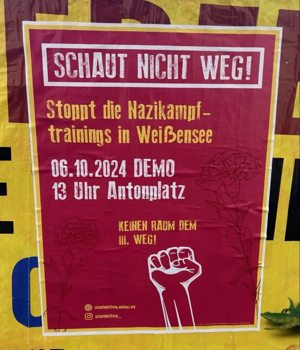

In [167]:
from PIL import Image
from IPython.display import display

img = Image.open('../../data/images/insta_images/0242.jpg')
img_resized = img.resize((300, 350))
print("Beispiel -photo- schlecht ")
display(img_resized)

In [168]:
df.loc[df['file_name'] == '0242.jpg', 'ocr_tesseract_psm11']

199    ['z', "| R Ühr nntl?nlflatz'", 'A', 'Ml']
Name: ocr_tesseract_psm11, dtype: object